In [24]:
# importing required libraries and modules
import numpy as np
import matplotlib.pyplot as plt
import random

In [25]:
def design_matrix(x_train, M):
    # This function generates a polynomial design matrix for machine learning, 
    # transforming input data into polynomial features for analysis.

    def powx(x, n):
        # Helper function to calculate the power of a number (x^n).
        return x**n

    # Initialize the design matrix with a column of ones (bias term for models).
    matrix = np.ones((len(x_train.tolist()), 1))  

    for j in range(M):
        # Generate a column of polynomial features for degree j+1.
        output_list = [pow(i[0], j+1) for i in x_train]  

        # Get the length of input data (number of rows in the design matrix).
        A = len(x_train.tolist())  

        # Reshape the polynomial features into a column.
        output_list = np.array(output_list).reshape(A, 1)  

        # Append the new column to the design matrix.
        matrix = np.concatenate((matrix, output_list), axis=1)  

    return matrix

In [26]:
def polynomial(X, w):
    # This function calculates the output of a polynomial function given input data (X)
    # and a set of weights/coefficients (w).

    y = []  # Initialize an empty list to store the calculated outputs.
    w = w.tolist()  # Convert the weights to a list for easier iteration.

    for i in X:  # Iterate through each input value in X.
        a = 0  # Initialize the result for the current input value.
        for j in range(len(w)):  # Iterate through each coefficient in w.
            a += w[j] * (i**j)  # Compute the weighted term for the j-th power and add it to the result.
        y.append(a)  # Append the final result for this input to the output list.

    return y  # Return the list of polynomial outputs.

In [28]:
def mean_squared_error(y_pred, y_real):
    # This function calculates the Mean Squared Error (MSE) for predicted vs. actual values.
    # MSE is a common metric to evaluate the accuracy of regression models.

    A = len(y_pred)  # Get the number of data points.
    y_pred = np.array(y_pred)  # Convert predicted values to a NumPy array.
    y_real = np.array(y_real)  # Convert actual values to a NumPy array.

    y = y_pred - y_real  # Compute the difference between predicted and actual values.
    error = 0  # Initialize the error accumulator.

    for i in y:  # Iterate through each difference.
        error += i**2  # Accumulate the squared differences.

    error = np.sqrt(error) / (2 * A)  # Compute the final error value (scaled root mean squared error).

    return error  # Return the MSE.

In [30]:
def least_squares(x_train, y_train, M):
    # This function performs the Least Squares regression method to compute the optimal 
    # weights for a polynomial model and calculates the error for the fit.

    F = design_matrix(x_train, M)  # Create the design matrix for polynomial features of degree M.

    # Compute the weight vector (w) using the Normal Equation: w = (F^T * F)^(-1) * F^T * y_train.
    a = np.dot(F.transpose(), F)  # Calculate F^T * F.
    a = np.linalg.inv(a)  # Invert the resulting matrix (F^T * F)^(-1).
    a = np.dot(a, F.transpose())  # Multiply by F^T.
    w = np.dot(a, y_train)  # Multiply by y_train to compute weights.
    
    # Adjust the weights vector to a 1D array.
    w = w.transpose()
    w = w[0]

    # Compute the error between the model predictions and actual values using MSE.
    err = mean_squared_error(y_train, polynomial(x_train, w))
    
    return (w, err)  # Return the optimal weights and the error.

In [32]:
def model_selection(x_train, y_train, x_val, y_val, M_values):
    # This function selects the best polynomial model by evaluating performance on validation data.
    # It uses Least Squares to fit models of varying degrees (M_values) and compares their errors.

    w_matrix = []  # Stores weights (w) for each polynomial degree in M_values.
    err_matrix = []  # Stores validation errors for each model.

    # Fit polynomial models for each degree in M_values and store their weights.
    for i in M_values:
        w_matrix.append(least_squares(x_train, y_train, i)[0])  # Store weights for degree i.

    # Evaluate the validation error for each model using the stored weights.
    for j in w_matrix:
        err_matrix.append(mean_squared_error(polynomial(x_val, j), y_val))  # Compute validation error.

    # Identify the model with the minimum validation error.
    err = min(err_matrix)  # Minimum validation error.
    w = w_matrix[err_matrix.index(err)]  # Weights corresponding to the best model.

    # Calculate training and validation errors for the selected model.
    train_err = mean_squared_error(polynomial(x_train, w), y_train)  # Training error.
    val_err = mean_squared_error(polynomial(x_val, w), y_val)  # Validation error.

    return (w, train_err, val_err)  # Return the optimal weights, training error, and validation error.

In [18]:
#run models and our model
def run():
    def target_output(x):
        return np.sin(2 * np.pi * x)

    def plot_model(subplot, x_train, y_train, x, y_obj, y_model, x_val=None, y_val=None, train_err=None,
               val_err=None):
        x_min = np.min([np.min(x_train), np.min(x)])
        x_max = np.max([np.max(x_train), np.max(x)])
        y_min = -1.5
        y_max = 1.5
        int_x = x_max - x_min
        x_beg = x_min - int_x / 14.0
        x_end = x_max + int_x / 14.0
        x_ticks = [x_min, x_max]
        int_y = y_max - y_min
        y_ticks = [y_min, y_min + 0.5 * int_y, y_max]

        sub.set_xlim(x_beg, x_end)
        sub.set_ylim(1.1 * y_min, 1.1 * y_max)
        sub.set_xticks(x_ticks)
        sub.set_yticks(y_ticks)
        sub.plot(x_train, y_train, 'o', markerfacecolor='none', markeredgecolor='blue', markersize=8,
                 markeredgewidth=2)
        sub.plot(x, y_obj, '-g', linewidth=2)
        sub.plot(x, y_model, '-r', linewidth=2)
        if x_val is not None and y_val is not None:
            sub.plot(x_val, y_val, 'o', markerfacecolor='none', markeredgecolor='red', markersize=8,
                     markeredgewidth=2)
        if train_err is not None and val_err is not None:
            sub.text(0, -1.3, 'Train error: {0:.5f}\nVal error:    {1:.5f}'.format(train_err, val_err),
                     bbox={'facecolor': 'none', 'pad': 10})

    
    
    def create_data():
        np.random.seed(1)
        x_train_8 = np.random.sample((8,1))*1.5
        x_train_50 = np.random.rand(50,1)
        x_val_10 = np.random.rand(10,1)
        x_val_20 = np.random.rand(20,1)
        y_train_8 = target_output(x_train_8) + np.random.randn(8,1)/3
        y_train_50 = target_output(x_train_50) + np.random.randn(50,1)/3
        y_val_10 = target_output(x_val_10) + np.random.randn(10,1)/3
        y_val_20 = target_output(x_val_20) + np.random.randn(20,1)/3
        
        created_data = {'x_train_8': x_train_8, 'x_train_50': x_train_50, 'x_val_10': x_val_10, 'x_val_20': x_val_20, 
                        'y_train_8': y_train_8, 'y_train_50': y_train_50, 'y_val_10': y_val_10, 'y_val_20': y_val_20}
        return created_data
    data = create_data()#pickle.load(open('LinearRegression/data.pkl', mode='rb'))
    
    x_plot = np.arange(0, 1.01, 0.01)
    y_obj = target_output(x_plot)

    # Dopasowanie wielomianow metoda najmniejszych kwadratow
    print('\n---Mean ---')
    print('-------------- Training examples amount N=8. --------------')
    fig = plt.figure(figsize=(12, 6), num='Least squuares task for N=8')

    for i in range(8):
        w, err = least_squares(data['x_train_8'], data['y_train_8'], i)
        y_model = polynomial(x_plot, w)
        sub = fig.add_subplot(2, 4, i + 1)
        plot_model(sub, data['x_train_8'], data['y_train_8'], x_plot, y_obj, y_model)
        sub.set_title("M = {}".format(i))

    plt.show()

    print('\n--- Fitting polynomials with least squares method ---')
    print('-------------- Training examples amount N=50. --------------')
    fig = plt.figure(figsize=(12, 6), num='Least squares task for N=50')

    for i in range(8):
        w, err = least_squares(data['x_train_50'], data['y_train_50'], i)
        y_model = polynomial(x_plot, w)
        sub = fig.add_subplot(2, 4, i + 1)
        plot_model(sub, data['x_train_50'], data['y_train_50'], x_plot, y_obj, y_model)
        sub.set_title("M = {}".format(i))

    plt.show()

    # Model selection
    print('\n--- Model Selection ---')
    print('---------------- Polynomial models degree M=0,...,7 ----------------')
    print('- Data training points number N=50. Validation data points number N=20 -')

    M_values = range(0, 7)
    w, train_err, val_err = model_selection(data['x_train_50'], data['y_train_50'],
                                            data['x_val_20'], data['y_val_20'], M_values)
    M = np.shape(w)[0] - 1
    y_model = polynomial(x_plot, w)

    fig = plt.figure(figsize=(6, 5), num='Selection model for M')
    sub = fig.add_subplot(1, 1, 1)
    sub.set_title('The best M={}'.format(M))
    plot_model(sub, data['x_train_50'], data['y_train_50'], x_plot, y_obj, y_model,
               data['x_val_20'], data['y_val_20'], train_err, val_err)

    plt.show()


---Mean ---
-------------- Training examples amount N=8. --------------


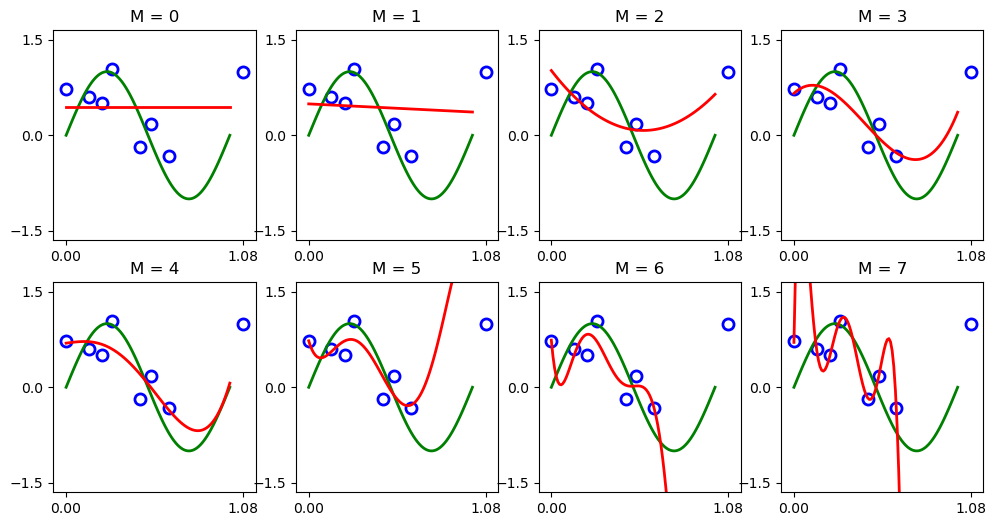


--- Fitting polynomials with least squares method ---
-------------- Training examples amount N=50. --------------


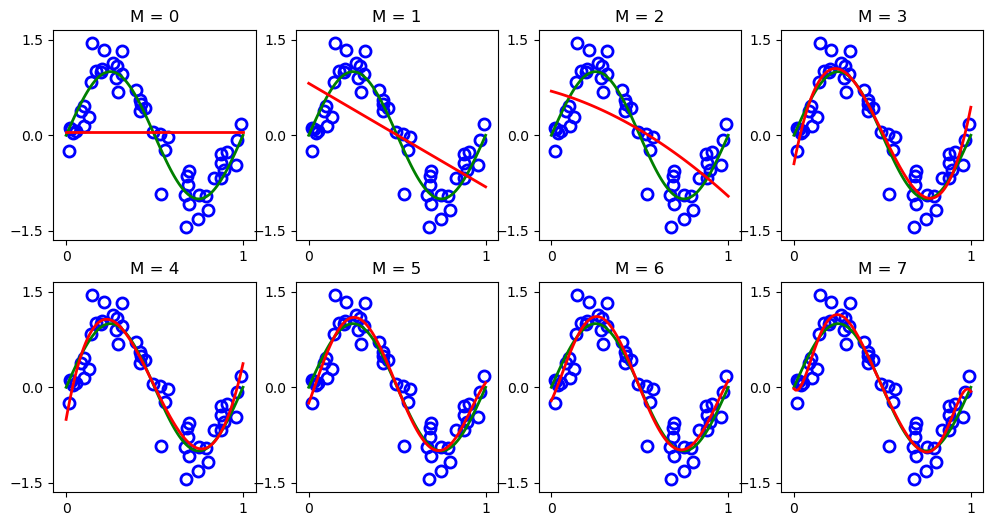


--- Model Selection ---
---------------- Polynomial models degree M=0,...,7 ----------------
- Data training points number N=50. Validation data points number N=20 -


TypeError: unsupported format string passed to numpy.ndarray.__format__

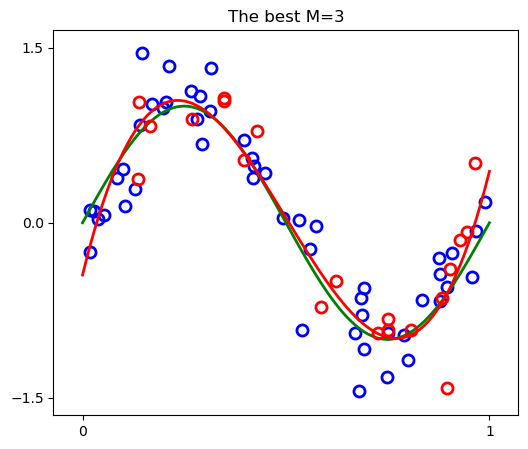

In [19]:
run()

In [33]:
def der(x, y_expected, w, b):
    # Computes the derivative of the cost function with respect to the weight (w).
    
    b = np.array([[b for i in range(np.shape(x)[0])]]).T  # Create a bias vector with the same shape as input.
    a = y_expected - ((x * w) + b)  # Calculate residuals (difference between expected and predicted values).
    c = 0  # Initialize derivative accumulator.

    for i in range(np.shape(x)[0]):  # Loop through each data point.
        c += x[i, 0] * a[i, 0]  # Accumulate the gradient contribution of each data point.
       
    return -1 * c * 2 / np.shape(x)[0]  # Return the average gradient with respect to w.

def dar(x, y_expected, w, b):
    # Computes the derivative of the cost function with respect to the bias (b).
    
    b = np.array([[b for i in range(np.shape(x)[0])]]).T  # Create a bias vector with the same shape as input.
    a = y_expected - ((x * w) + b)  # Calculate residuals.
    c = 0  # Initialize derivative accumulator.

    for i in range(np.shape(x)[0]):  # Loop through each data point.
        c += -1 * a[i, 0]  # Accumulate the gradient contribution of each data point.
        
    return c * 2 / np.shape(x)[0]  # Return the average gradient with respect to b.

def gradient_descent(x, y_expected, epochs=1000, learning_rate=0.00001):
    # Performs gradient descent to minimize the cost function for a linear regression model.
    # Returns the optimal weights, bias, and the cost history over epochs.

    w = random.uniform(0, 1)  # Initialize the weight (w) randomly between 0 and 1.
    b = random.uniform(0, 1)  # Initialize the bias (b) randomly between 0 and 1.
    cost = []  # To store the cost (error) at each epoch.

    for i in range(epochs):  # Iterate through the specified number of epochs.
        # Update weight (w) using the gradient with respect to w.
        w = w - learning_rate * der(x, y_expected, w, b)
        # Update bias (b) using the gradient with respect to b.
        b = b - learning_rate * dar(x, y_expected, w, b)

        # Calculate the cost (sum of squared residuals) for the current model parameters.
        a = 0
        for j in y_expected - w * x:
            a += j**2
        cost.append(a)  # Store the current cost.

    cost = np.array(cost)  # Convert the cost history to a NumPy array.
    return w, b, cost / np.shape(x)[0]  # Return the optimized weights, bias, and normalized cost history.

In [36]:
def real_world_example():
    # Demonstrates a real-world application of linear regression using study hours and exam scores.

    # Load data points from a CSV file ("D:\\data.txt") with two columns: hours of study and exam scores.
    points = np.genfromtxt("D:\\data.txt", delimiter=',')
    
    # Print a sample of the data for verification.
    print('Some example hours and scores from exam:')
    print(points[:5])

    # Separate the data into input (hours) and output (scores).
    x, y = points[0], points[1]  # x: hours of study, y: exam scores.

    # Reshape the data into column vectors for processing.
    x = np.array([[i for i in x]]).T  
    y = np.array([[i for i in y]]).T  

    # Perform gradient descent to calculate the optimal weight (w) and bias (b) for the data.
    w, b, costs = gradient_descent(x, y, epochs=30000, learning_rate=1e-8)
    
    # Print the resulting weight and bias values.
    print(w, b)

    # Plot the cost function values over epochs to visualize the optimization process.
    plt.plot(costs)
    plt.title('Cost')  # Set the title of the plot.
    plt.xlabel('Epoch number')  # Label the x-axis.
    plt.ylabel('Cost value')  # Label the y-axis.
    plt.grid()  # Add a grid for better visualization.
    plt.show()

    # Create data for the regression line based on the learned weight and bias.
    x_plot = np.arange(20, 70, 0.5)  # Generate a range of values for study hours.
    y_plot = x_plot * w + b  # Calculate corresponding scores using the regression line.

    # Extract original data points for plotting.
    hours = points[:, 0]  # Original study hours.
    scores = points[:, 1]  # Original exam scores.

    # Plot the original data points and the regression line.
    plt.plot(hours, scores, '.', x_plot, y_plot, '-')
    plt.xlabel('Hours of study')  # Label the x-axis.
    plt.ylabel('Scores on exam')  # Label the y-axis.
    plt.legend(['Score points', 'Linear regression'])  # Add a legend.
    plt.grid()  # Add a grid for better visualization.
    
    plt.show()  # Display the plot.

Some example hours and scores from exam:
[[32.50234527 31.70700585]
 [53.42680403 68.77759598]
 [61.53035803 62.5623823 ]
 [47.47563963 71.54663223]
 [59.81320787 87.23092513]]
1.1086336839427848 0.43908291021332113


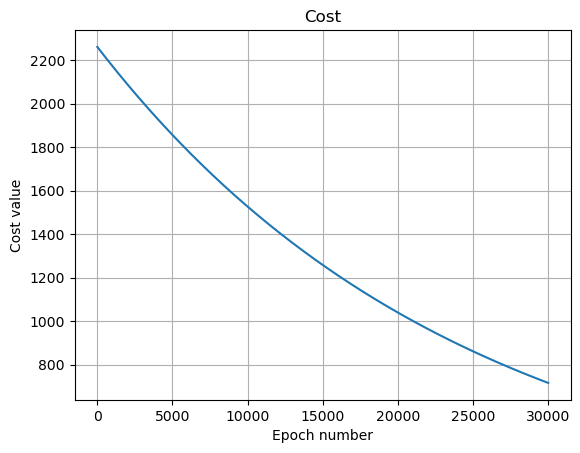

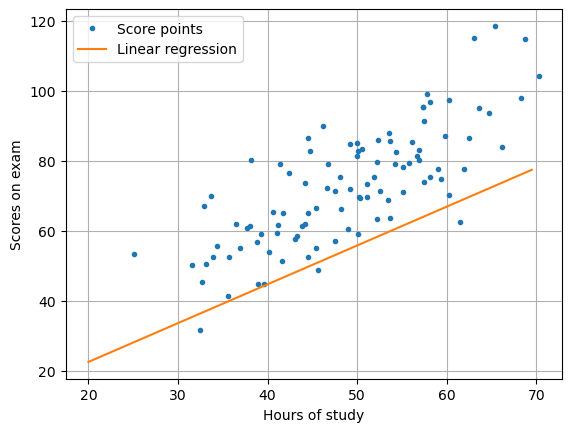

In [23]:
#test our model
real_world_example()